<a href="https://colab.research.google.com/github/fernandapilat/bootcamp-data-analytics/blob/master/Dataviz_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando dados e criando Dataframes com Pandas**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **Tradução**

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
    }

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns=renomear)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# **Biblioteca Seaborn**

In [ ]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.9/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


# **Análise 1 - Relação entre valor da conta e gorjetas**

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


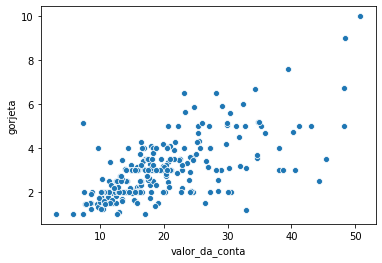

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

Visualmente o valor da gorjeta **aumenta** conforme **aumenta** o valor da conta.

In [ ]:
print('A base de dados contém {} registros.'.format(gorjetas.shape[0]))
print('\nRegistros não nulos:\n')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos:



valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## **Criando o campo porcentagem**

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


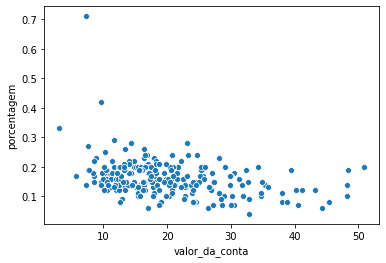

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta.**

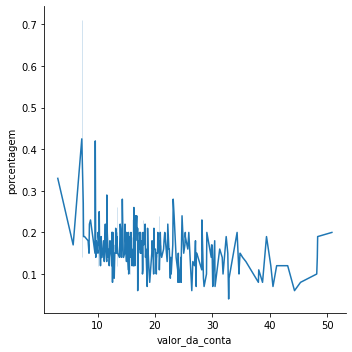

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

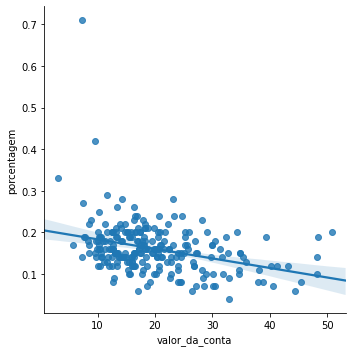

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

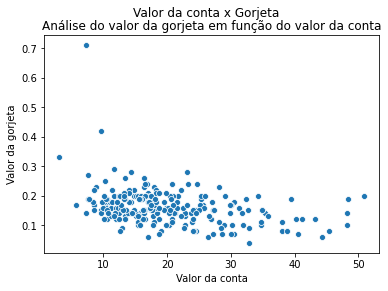

In [ ]:
porcentagem_conta.set_title('Análise do valor da gorjeta em função do valor da conta')
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')

porcentagem_conta.set(xlabel='Valor da conta', 
                      ylabel='Valor da gorjeta')

porcentagem_conta.get_figure()

In [ ]:
imagem = porcentagem_conta.get_figure()

In [ ]:
imagem.savefig('imagem.png')

# **Análise 2 - Sobremesa**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


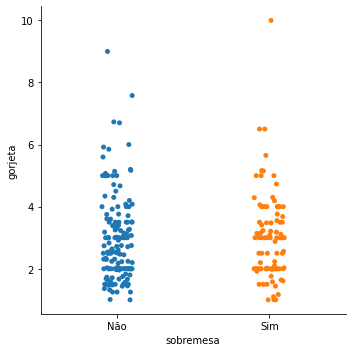

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

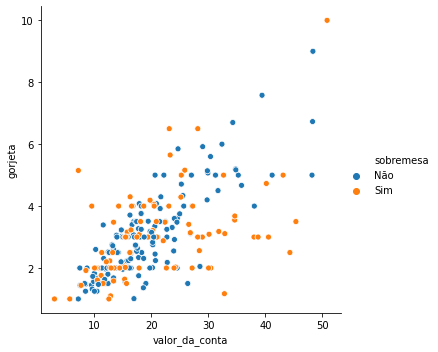

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

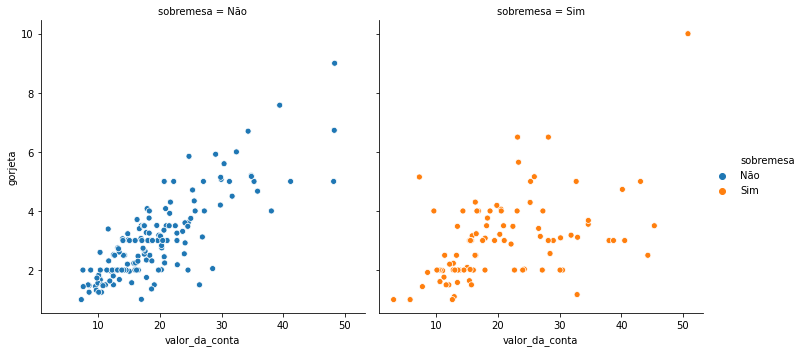

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

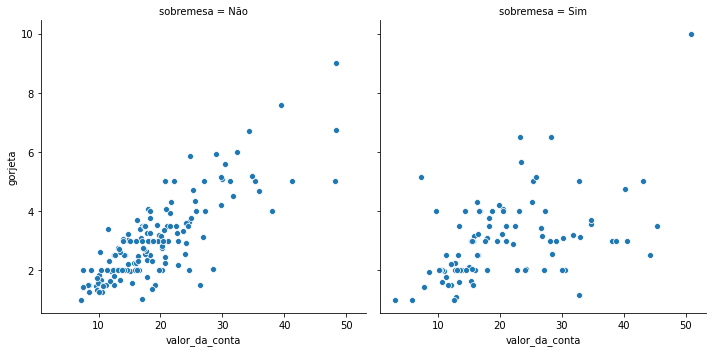

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

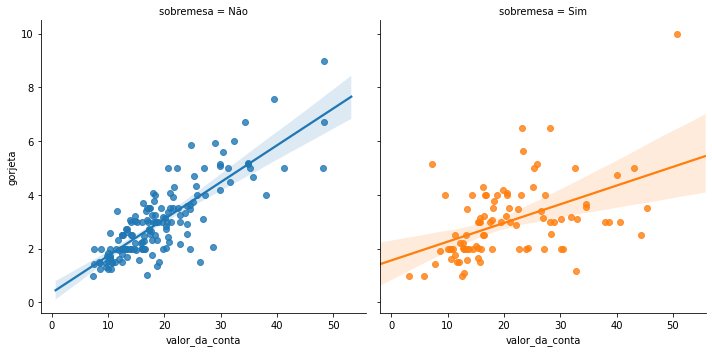

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

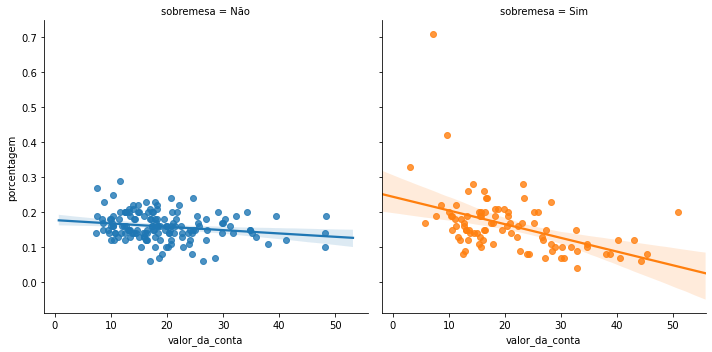

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

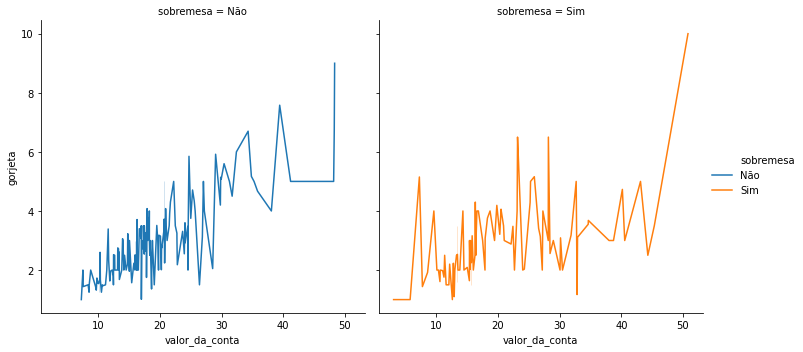

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', kind='line', col='sobremesa', data=gorjetas)

**Visualmente existe uma diferença no valor da gorjeta daqueles que não pediram para aqueles que pediram sobremesa.**

# **Teste de hipóteses**

**H<sup>null</sup>** 
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é: {}.'.format(r.pvalue.round(3)))
print('Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: {}.'.format(r.statistic.round(3)))

O valor do p-value é: 0.527.
Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: -0.633.


# **Análise 3 - Relação entre pagamento de gorjetas por dia da semana**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

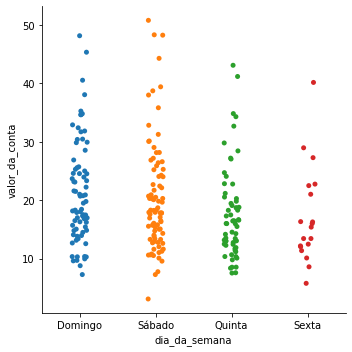

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

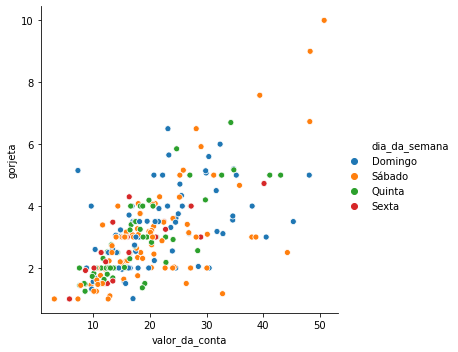

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

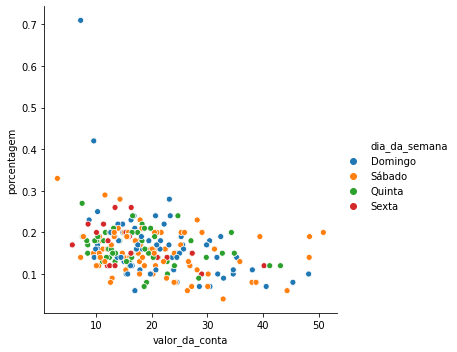

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

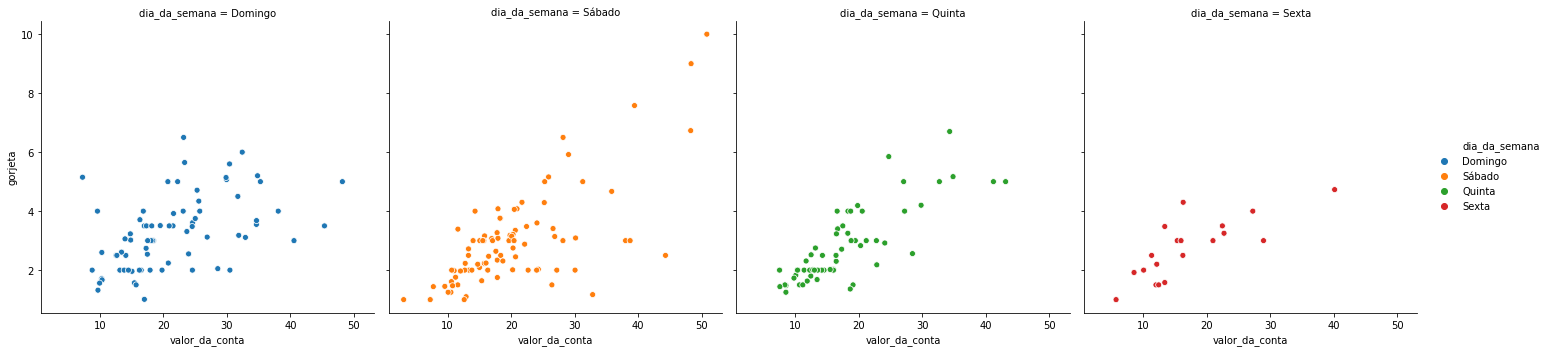

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

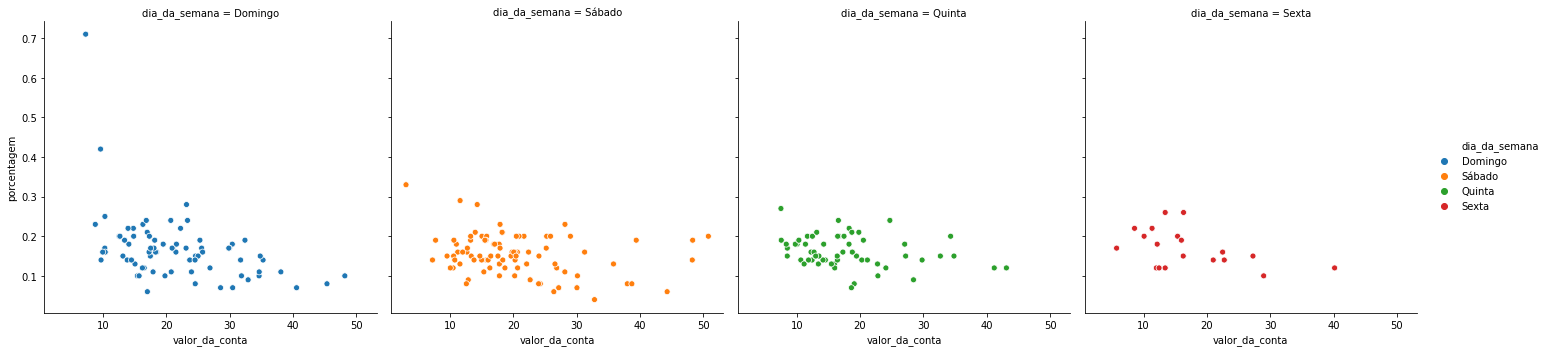

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

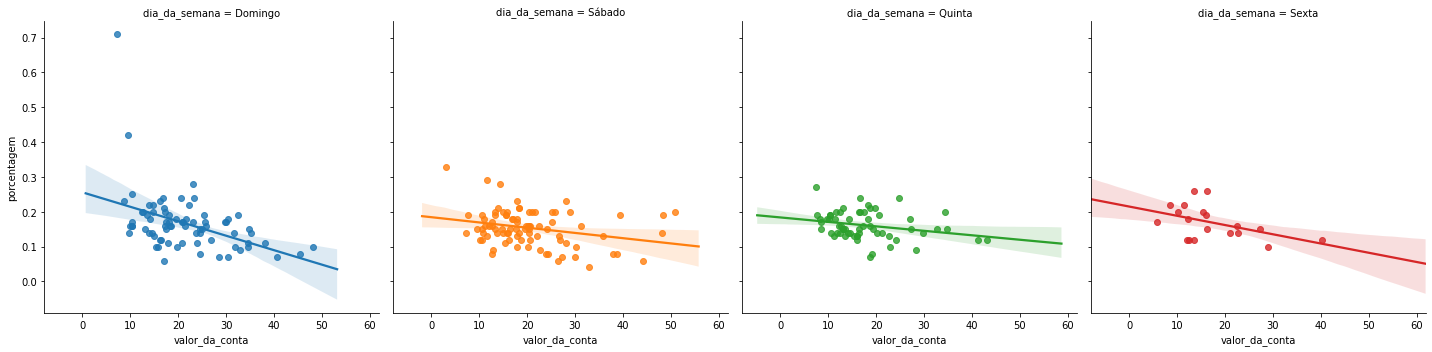

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}.'.format(media_geral_gorjetas.round(2)))

A média geral das gorjetas é de 3.0.


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean().round(3) [['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410,3.255,0.167
Quinta,17.683,2.771,0.161
Sexta,17.152,2.735,0.169
Sábado,20.441,2.993,0.154


In [ ]:
print('Frequência dos dias:\n')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:



Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## **Teste de hipóteses**

**H<sup>null</sup>** 
> **A distribuição do valor da conta é a mesma no sábado e no domingo.**

**H<sup>alt</sup>**
> **A distribuição do valor da conta NÃO é a mesma no sábado e no domingo.**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
r2 = ranksums(valor_conta_sabado, valor_conta_domingo)
print('O valor do p-value é: {}.'.format(r2.pvalue.round(3)))
print('Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: {}.'.format(r2 .statistic.round(3)))
print('\nSendo assim, nós aceitamos a H0 (hipótese nula) de que a distribuição do valor da conta é a mesma no sábado e no domingo.')

#É sempre importante destacar que quando o pvalue > 0.05, ou outro nível de significância definido, nós aceitamos a hipótese nula.

O valor do p-value é: 0.358.
Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: -0.92.

Sendo assim, nós aceitamos a H0 (hipótese nula) de que a distribuição do valor da conta é a mesma no sábado e no domingo.


# **Análise 4 - Hora do dia**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

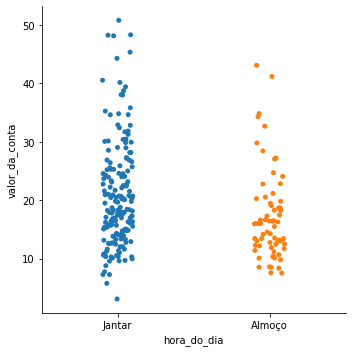

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

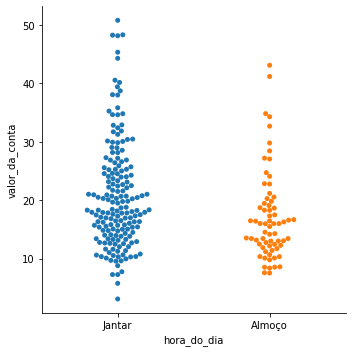

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

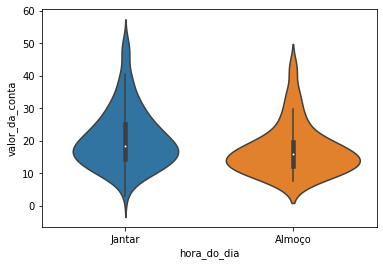

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

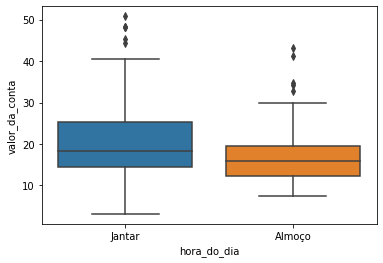

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

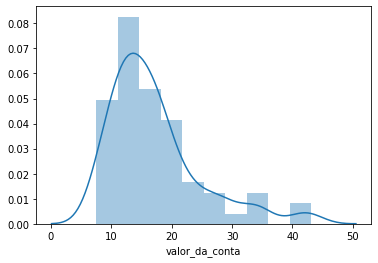

In [ ]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

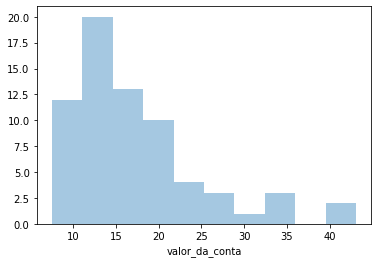

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

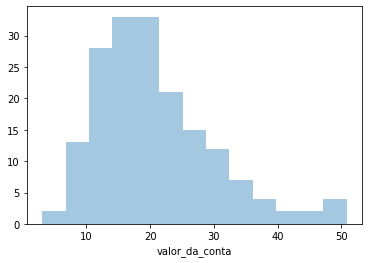

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean().round(2) [['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.17,2.73,0.16
Jantar,20.80,3.10,0.16


## **Teste de hipóteses**

**H<sup>null</sup>** 
> **A distribuição do valor da conta é a mesma no jantar e no almoço.**

**H<sup>alt</sup>**
> **A distribuição do valor da conta NÃO é a mesma no jantar e no almoço.**

In [ ]:
r3 = ranksums(jantar, almoco)

In [ ]:
print('O valor do p-value é: {}.'.format(r3.pvalue.round(3)))
print('Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: {}.'.format(r3 .statistic.round(3)))
print('\nSendo assim, nós aceitamos a HA (hipótese alternativa) de que a distribuição do valor da conta não é a mesma no jantar e no almoço.')

O valor do p-value é: 0.001.
Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: 3.244.

Sendo assim, nós aceitamos a HA (hipótese alternativa) de que a distribuição do valor da conta não é a mesma no jantar e no almoço.


## **Teste de hipóteses II**

**H<sup>null</sup>** 
> **A distribuição da taxa de gorjeta é a mesma no jantar e no almoço.**

**H<sup>alt</sup>**
> **A distribuição da taxa de gorjeta NÃO é a mesma no jantar e no almoço.**

In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [ ]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [ ]:
print('O valor do p-value é: {}.'.format(r4.pvalue.round(3)))
print('Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: {}.'.format(r4 .statistic.round(3)))
print('\nSendo assim, nós aceitamos a H0 (hipótese nula) de que a distribuição da taxa de gorjeta é a mesma no jantar e no almoço.')

O valor do p-value é: 0.26.
Enquanto o valor da estatística de teste (Wilcoxon rank-sum) é: 1.126.

Sendo assim, nós aceitamos a H0 (hipótese nula) de que a distribuição da taxa de gorjeta é a mesma no jantar e no almoço.
